<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

In [0]:
diagnosis = df['diagnosis'].map({"B": 0, "M": 1})

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop('diagnosis', axis=1)

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [0]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

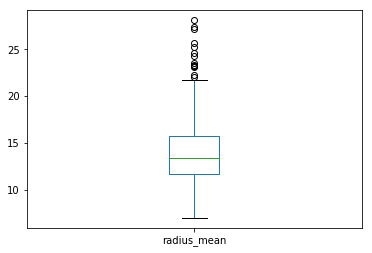

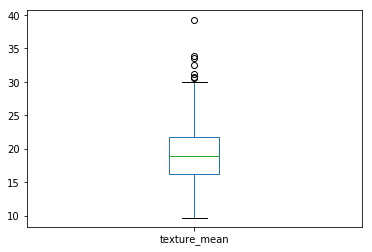

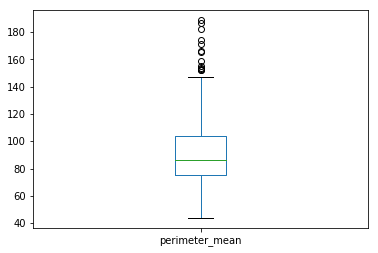

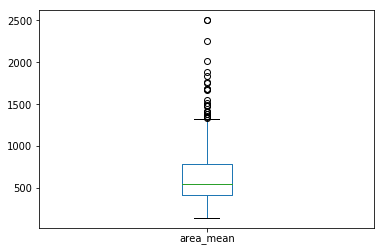

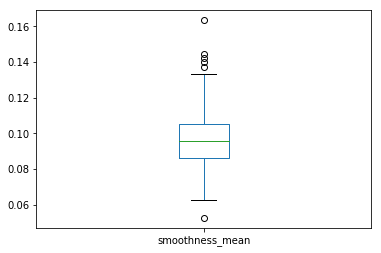

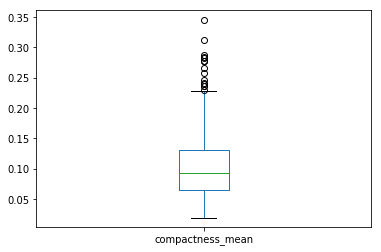

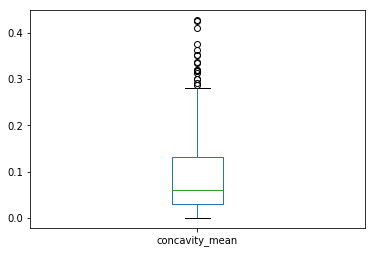

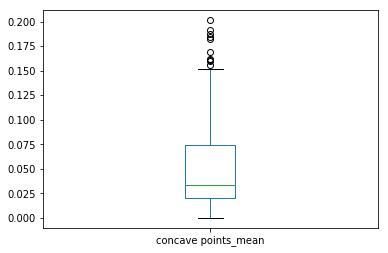

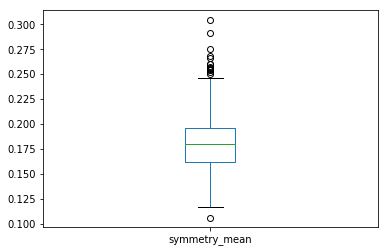

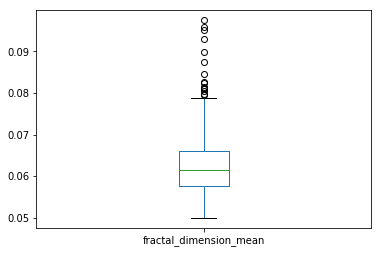

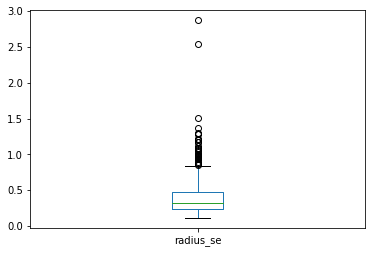

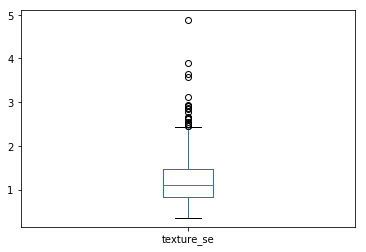

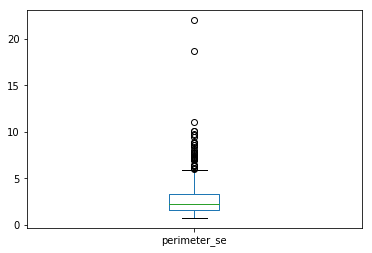

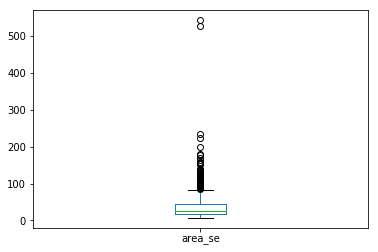

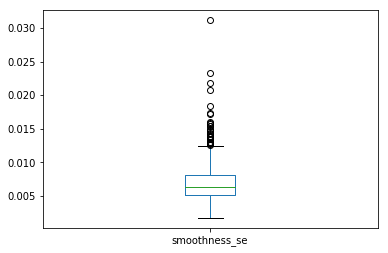

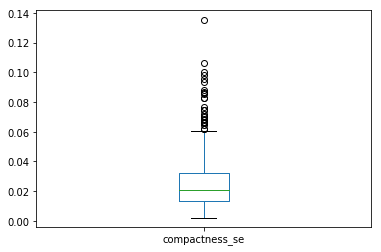

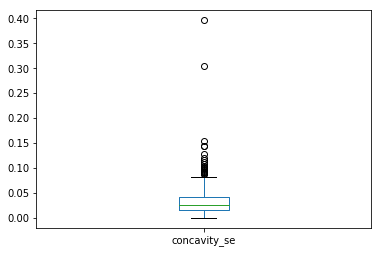

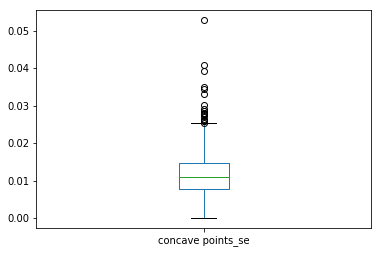

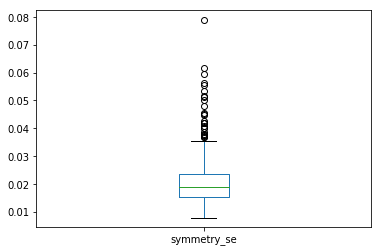

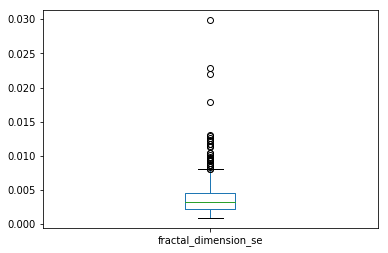

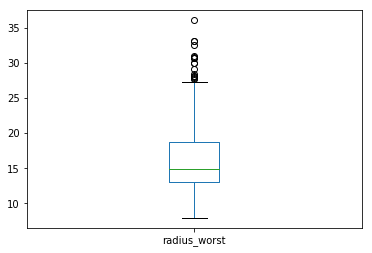

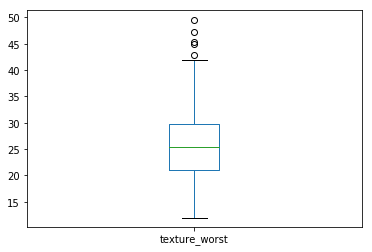

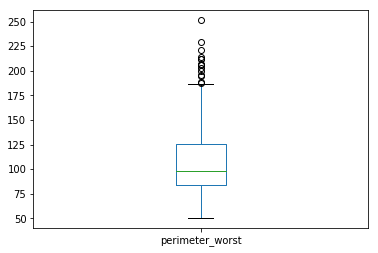

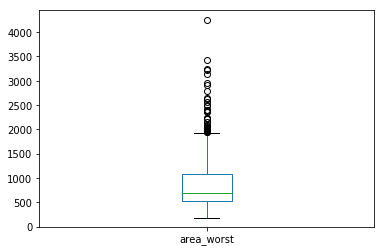

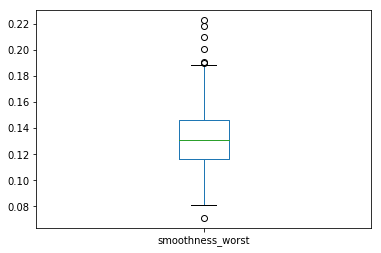

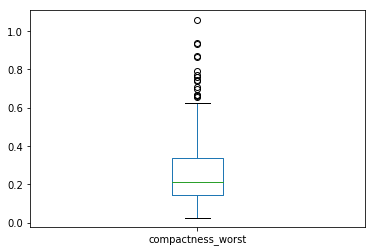

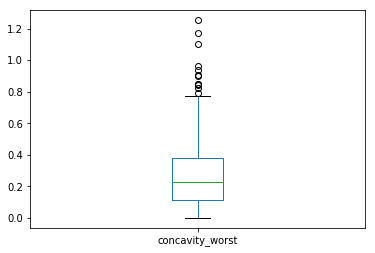

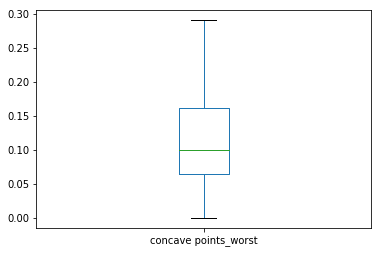

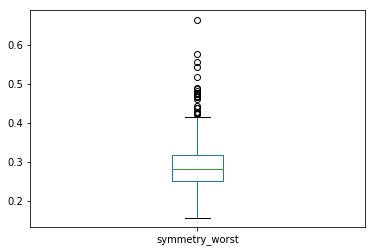

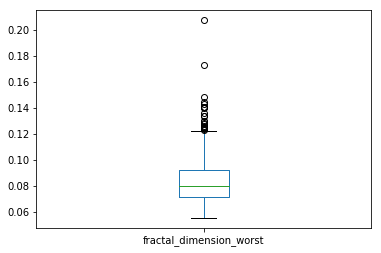

In [5]:
for col in df.columns.values:
    df[col].plot(kind="box")
    plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.cluster import contingency_matrix, completeness_score, mutual_info_score
from sklearn.metrics import accuracy_score
import time

In [0]:
X = (df - df.mean()) / df.std(ddof=0)

In [16]:
# kmeans on all PC

pca = PCA()
pc = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(pc)
labels = kmeans.labels_
accuracy_score(diagnosis, labels)

0.9103690685413005

In [13]:
#  kmeans on just scaled data

kmeans = KMeans(n_clusters=2)
start = time.time()
kmeans.fit(X)
print('time ', time.time() - start)
labels1 = kmeans.labels_
print('accuracy_score', accuracy_score(diagnosis, labels1))
print(contingency_matrix(diagnosis, labels1))

time  0.05294036865234375
accuracy_score 0.9103690685413005
[[343  14]
 [ 37 175]]


In [10]:
# kmeans on first 3 principal components

pc = pc[:, :3]
kmeans = KMeans(n_clusters=2)
start = time.time()
kmeans.fit(pc)
print('time ', time.time() - start)
labels = kmeans.labels_
print('accuracy_score', accuracy_score(diagnosis, labels))
print(contingency_matrix(diagnosis, labels))

time  0.02898859977722168
accuracy_score 0.9103690685413005
[[343  14]
 [ 37 175]]


In [21]:
pca = PCA(2)
pc = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(pc)
labels = kmeans.labels_
print(accuracy_score(diagnosis, labels))

0.9068541300527241


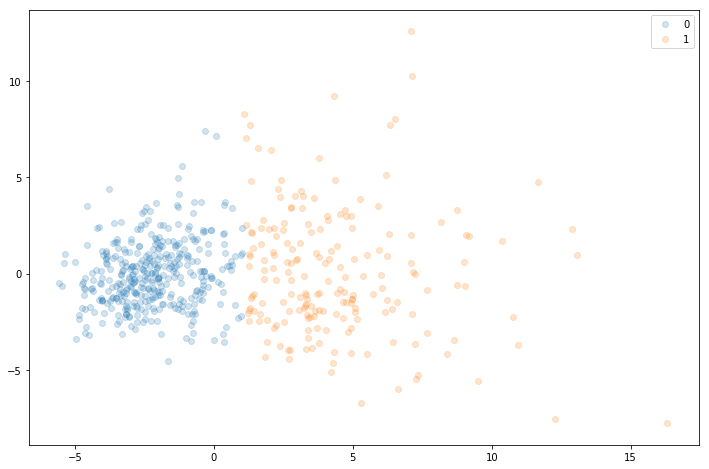

In [22]:
pcdf = pd.DataFrame(pc)
pcdf['label'] = labels
groups = pcdf.groupby('label')

# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.scatter(group[0], group[1], label=name, alpha=.2)
ax.legend()

plt.show()

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.